In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor


In [5]:
car = pd.read_csv('car-mpg.csv')

car.fillna(car.mean(), inplace=True)

x = car.drop(['MPG','Make'], axis=1)

le1 = LabelEncoder()
x['DriveTrain'] = le1.fit_transform(x['DriveTrain'])

y = car['MPG']

C:\Users\porpu\AppData\Local\Temp\ipykernel_19324\2291179236.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.fillna(car.mean(), inplace=True)


In [6]:
x.head(10)

,DriveTrain,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
0,0,3.5,6.0,265,4451,106,189
1,1,2.0,4.0,200,2778,101,172
2,1,2.4,4.0,200,3230,105,183
3,1,3.2,6.0,270,3575,108,186
4,1,3.5,6.0,225,3880,115,197
5,1,3.5,6.0,225,3893,115,197
6,2,3.2,6.0,290,3153,100,174
7,1,1.8,4.0,170,3252,104,179
8,1,1.8,4.0,170,3638,105,180
9,1,3.0,6.0,220,3462,104,179


In [7]:
regi = CatBoostRegressor(iterations=1500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE')
regi.fit(x, y)

0:	learn: 5.0864719	total: 172ms	remaining: 4m 17s
1:	learn: 4.9528941	total: 179ms	remaining: 2m 14s
2:	learn: 4.8208990	total: 189ms	remaining: 1m 34s
3:	learn: 4.7029933	total: 204ms	remaining: 1m 16s
4:	learn: 4.5818692	total: 221ms	remaining: 1m 6s
5:	learn: 4.4659411	total: 237ms	remaining: 59.1s
6:	learn: 4.3663858	total: 250ms	remaining: 53.3s
7:	learn: 4.2675491	total: 257ms	remaining: 48s
8:	learn: 4.1666598	total: 274ms	remaining: 45.4s
9:	learn: 4.0663743	total: 286ms	remaining: 42.6s
10:	learn: 3.9792845	total: 297ms	remaining: 40.2s
11:	learn: 3.8923209	total: 303ms	remaining: 37.6s
12:	learn: 3.8096338	total: 308ms	remaining: 35.3s
13:	learn: 3.7294217	total: 310ms	remaining: 32.9s
14:	learn: 3.6540613	total: 319ms	remaining: 31.6s
15:	learn: 3.5858971	total: 323ms	remaining: 30s
16:	learn: 3.5139046	total: 331ms	remaining: 28.9s
17:	learn: 3.4469956	total: 340ms	remaining: 28s
18:	learn: 3.3807098	total: 346ms	remaining: 27s
19:	learn: 3.3233249	total: 353ms	remaining: 

In [8]:
score = regi.score(x, y)
score

0.9997110612021696

In [9]:
regi.predict([[1, 2.8, 4, 150, 2500, 108, 172]])

array([24.92179991])

DriveTrain 8.126738203846722
EngineSize 17.823615751214824
Cylinders 8.16999988929259
Horsepower 27.7329104605395
Weight 22.12212832920025
Wheelbase 6.884138355514923
Length 9.140469010391191


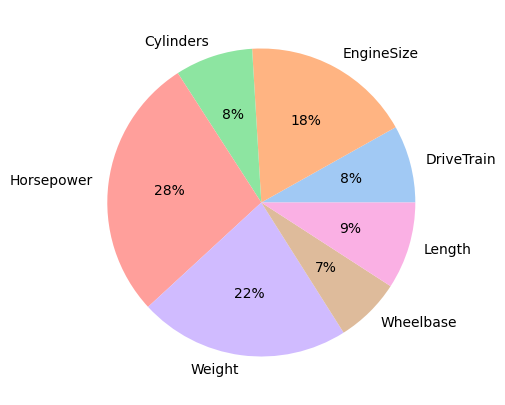

In [10]:
ftip = regi.feature_importances_

plt.figure(figsize=(5,5))

colors = sns.color_palette('pastel')[0:7]
plt.pie(x=ftip, labels=x.columns, colors = colors, autopct='%.0f%%')

for i in range(0, len(ftip)):
    print(x.columns[i], ftip[i])

plt.show()



## รถล้อหน้า เครื่องยนต์ความจุ 2.8 ลิตร 4 สูบ 150 แรงม้า น้ําหนัก 2500 กก. ความยาวฐานล้อ 108 ความยาวตัวรถ 172  
# มีอัตราการกินน้ำมันประมาณ 24.92179991 MPG

## วิเคราะห์ผลที่ได้รวมถึงน้ําหนักของแต่ละปัจจัยที่ใช้ด้วย
### ปัจจัยที่ใช้ในการวิเคราะห์
### โดยมีอัตราส่วนที่ส่งผลให้อัตราการกินน้ำมันมากขึ้นจากมากไปน้อยดังนี้
### 1. แรงม้า 2. น้ำหนัก 3. เครื่องยนต์ความจุ 4. ความยาวตัวรถ 5. เคลื่อนที่ 6. ลูกสูบ 7. ความยาวฐานล้อ
